<a href="https://colab.research.google.com/github/beneditomacedo/dl_notebooks/blob/master/Udemy_TensorFlow20_12_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Udemy: Tensorflow 2.0: Deep Learning and Artificial Intelligence
available at: https://www.udemy.com/course/deep-learning-tensorflow-2/learn/lecture/15397338#overview

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# Load in data
from sklearn.datasets import load_breast_cancer

In [3]:
# Load dataset
data = load_breast_cancer()

In [4]:
# check the data type
type(data)

sklearn.utils.Bunch

In [5]:
# bunch is similiar to a dictionary
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
# show the feature names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
# show the data shape
data.data.shape

(569, 30)

In [9]:
data.data[1]

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02])

In [10]:
# show the target names
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
# show the target shape
data.target.shape

(569,)

In [12]:
# show the target data
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [16]:
N, D = X_train.shape
print(f'N -> {N}, D -> {D}')

N -> 381, D -> 30


In [17]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Train the model
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=250,verbose=0)

# Evaluate the model
print(f'Train score: {model.evaluate(X_train,y_train)}')
print(f'Test score: {model.evaluate(X_test,y_test)}')

12/12 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.9869
Train score: [0.05632100999355316, 0.9868766665458679]
6/6 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.9787
Test score: [0.08277329802513123, 0.978723406791687]


The table below shows the accuracy when the number of epoch changes

| Epochs | Train Accuracy | Test Accuracy |
| ---:   | :-----------:  | :-----------: |
| 5      |     0.816      |    0.792      |
| 10     |     0.916      |    0.936      | 
| 100    |     0.960      |    0.978      | 
| 500    |     0.984      |    0.984     |

In [19]:
# History is a dictionary
#
type(r)

tensorflow.python.keras.callbacks.History

In [20]:
# Print the keys in History object
#
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [22]:
print(r.history['loss'])

[0.4412907361984253, 0.40382829308509827, 0.37261641025543213, 0.34587931632995605, 0.3224475681781769, 0.30333665013313293, 0.28563034534454346, 0.27099791169166565, 0.257684588432312, 0.2460898905992508, 0.23573938012123108, 0.22634711861610413, 0.21790114045143127, 0.2102392017841339, 0.20313331484794617, 0.19682276248931885, 0.1911398023366928, 0.18557342886924744, 0.18045003712177277, 0.17585229873657227, 0.17158450186252594, 0.16755621135234833, 0.16368989646434784, 0.1601739078760147, 0.15692058205604553, 0.15372423827648163, 0.15067988634109497, 0.14803345501422882, 0.14525315165519714, 0.1428324580192566, 0.14036151766777039, 0.1380947381258011, 0.1359950602054596, 0.13390639424324036, 0.13192200660705566, 0.1300431340932846, 0.12815314531326294, 0.12648649513721466, 0.12485838681459427, 0.12326645851135254, 0.12169307470321655, 0.12029030919075012, 0.11882613599300385, 0.11750542372465134, 0.11617138236761093, 0.1149090975522995, 0.11367859691381454, 0.11252223700284958, 0.11

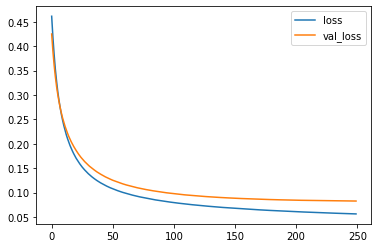

In [34]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

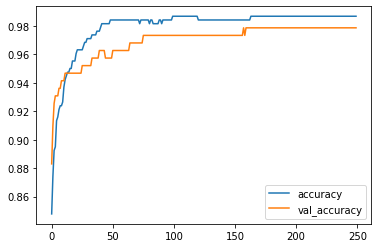

In [35]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()